#

## Importing the required libraries and the dataset
### Splitting the dataset into training and testing sets

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_data,train_labels) , (test_data, test_labels) = mnist.load_data()


### Cecking the shapes of training data, testing data and the corresponding labels

In [ ]:
train_data.shape , train_labels.shape , test_data.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
class_names = ['0' , '1' , '2', '3' , '4' , '5' , '6' , '7' , '8' , '9']

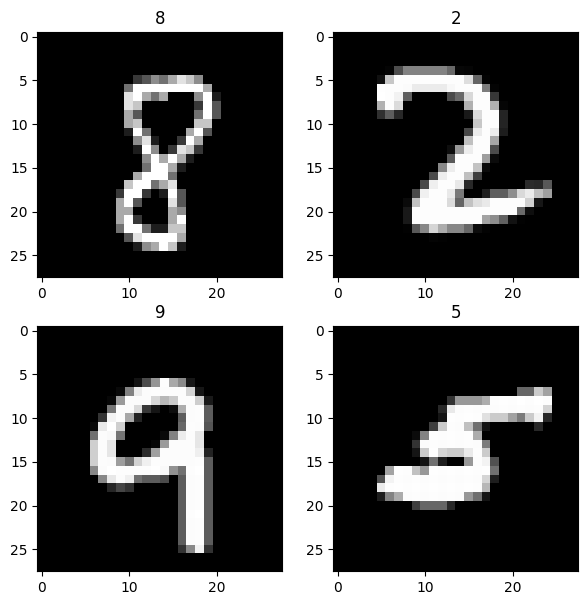

In [ ]:
# Random images
import matplotlib.pyplot as plt
import random
plt.figure(figsize = (7, 7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])


In [ ]:
train_data.min() , train_data.max()

(0, 255)

In [ ]:
train_data = train_data/255.
test_data = test_data/255.

train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_mnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    #tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_mnist.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['accuracy'])


history = model_mnist.fit(train_data , train_labels , epochs = 10 , validation_data = (test_data ,test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2593 - accuracy: 0.9263 - val_loss: 0.1363 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1143 - accuracy: 0.9663 - val_loss: 0.1199 - val_accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0795 - accuracy: 0.9753 - val_loss: 0.0793 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0588 - accuracy: 0.9822 - val_loss: 0.0799 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0828 - val_accuracy: 0.9742
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0727 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0291 - accuracy: 0.9913 - val_loss: 0.0773 - val_accur

In [ ]:
predictions = model_mnist.predict(test_data)

313/313 [==============================] - 1s 2ms/step


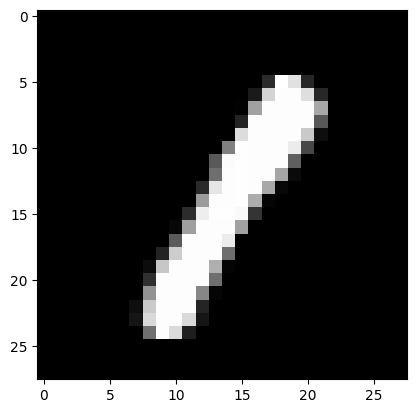

prediction :  1 Real :  1


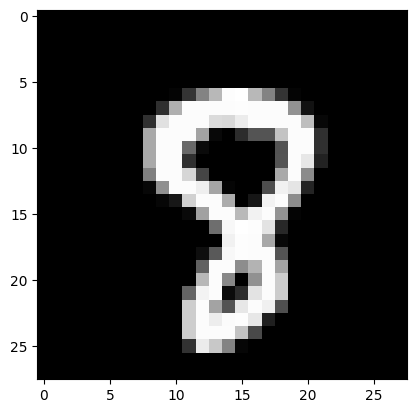

prediction :  8 Real :  8


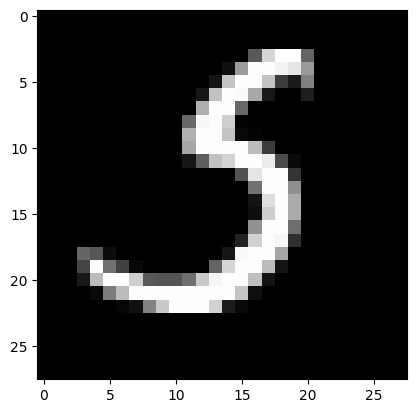

prediction :  5 Real :  5


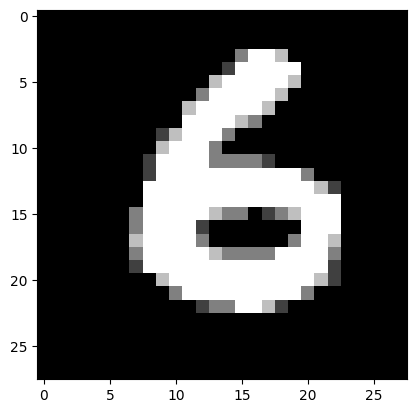

prediction :  6 Real :  6


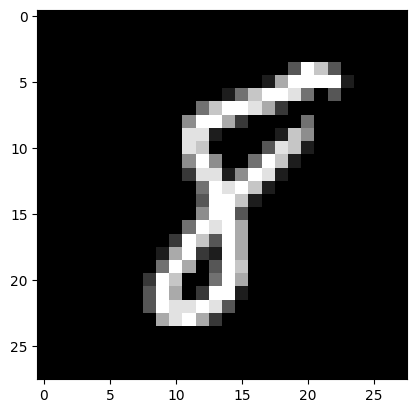

prediction :  8 Real :  8


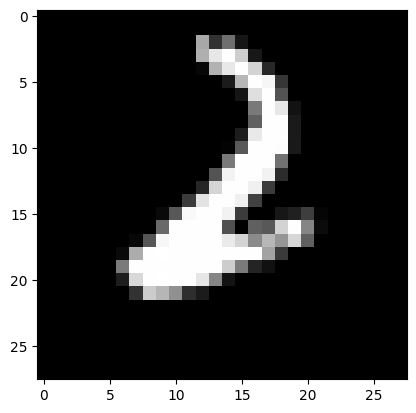

prediction :  2 Real :  2


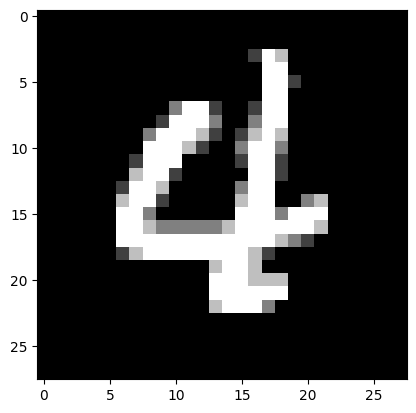

prediction :  4 Real :  4


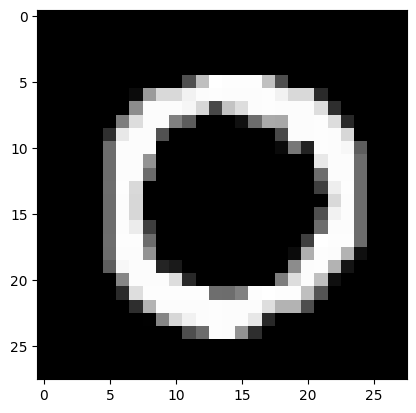

prediction :  0 Real :  0


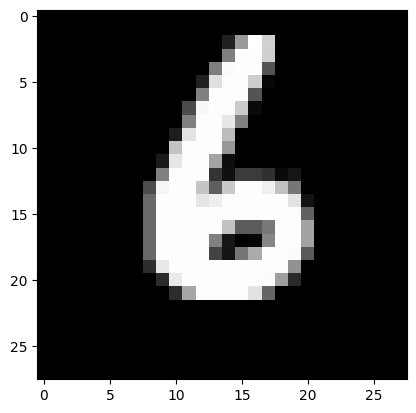

prediction :  6 Real :  6


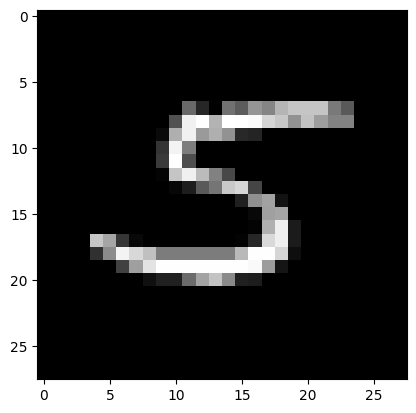

prediction :  5 Real :  5


In [ ]:
import numpy as np
plt.gray()
for _ in range(10):
    random_no = np.random.randint(test_labels.shape[0])
    plt.imshow(test_data[random_no].reshape(28, 28))
    plt.show()
    pred = np.argmax(predictions[random_no])
    print("prediction : ",class_names[pred] , "Real : " , test_labels[random_no])